In [40]:
import pandas as pd
import sqlite3
import os

# create the sqlite DB
db = sqlite3.connect("LAESLData.db")

# read CSV into dataframe
df1 = pd.read_csv("LAESLData.csv", header="infer")

# convert the pandas dataframe to a sqlite table
df1.to_sql("LAESL", db, if_exists="replace")

def run_query(query):
    return pd.read_sql_query(query,db)


os.getcwd()



C:\Users\makim\Anaconda3\lib\site-packages\pandas\core\generic.py:2712: UserWarning:

The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.



'C:\\Users\\makim\\LAESLData\\LAESLData'

In [41]:
# view dataframe
# df1
query = ''' 
SELECT * 
FROM LAESL'''
run_query(query)


,index,Unnamed: 0,InitialOfName,Country,Language,Gender,BirthYear,HighSchool_Diploma,US_HighSchool_Diploma/GED,Interested_in_GED
0,0,1,A.A,Egypt,Arabic,F,1986,Yes,No,Yes
1,1,2,R.A,Egypt,Arabic,F,1982,Yes,No,Yes
2,2,3,K.A,Egypt,Arabic,M,1987,Yes,No,Yes
3,3,4,H.A,Morroco,Arabic,M,1983,Yes,No,No
4,4,5,A.A,Iraq,Arabic,F,1980,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...
170,170,174,S.Y,Koirea,Korean,F,1982,Yes,No,No
171,171,175,A.Y,Japan,Japanese,M,1984,Yes,No,No
172,172,176,Z.Y,Algeria,Arabic,F,1987,Yes,No,No
173,173,177,Z.Z,China,Chinese,F,1987,Yes,No,No


In [42]:
#Countries in alphabetical order.
query = '''
SELECT DISTINCT Country 
FROM LAESL 
ORDER BY Country ASC;

'''

run_query(query)


,Country
0,Afghanistan
1,Algeria
2,Belarus
3,Bolivia
4,Brazil
5,Burundi
6,China
7,Colombia
8,Cuba
9,D.R Congo


In [43]:
# Number of people from each country
query = '''
SELECT Country, COUNT(*) AS "Number_of_people" 
FROM LAESL 
GROUP BY Country
ORDER BY Number_of_people DESC
;

'''

df2 = run_query(query)

# read data out of the database and into dataframe
df2 = df2.sort_values("Number_of_people", ascending = False).reset_index(drop=True)


df2

,Country,Number_of_people
0,Cuba,43
1,Mexico,21
2,Algeria,11
3,China,10
4,Brazil,9
5,Venezuela,6
6,Japan,6
7,Egypt,6
8,D.R Congo,6
9,Colombia,6


In [44]:
#Speakers in alphabetical order.
query = '''
SELECT DISTINCT Language 
FROM LAESL 
ORDER BY Language ASC;

'''

run_query(query)

,Language
0,Arabic
1,Chinese
2,French
3,Hindi
4,Japanese
5,Kazakh
6,Korean
7,Kreyol
8,Nepali
9,Portuguese


In [45]:
# Number of speakers.
query = '''
SELECT Language, COUNT(*) AS Number_of_Speakers
FROM LAESL 
GROUP BY Language
ORDER BY Number_of_Speakers DESC;

'''
df3 = run_query(query)

# read data out of the database and into dataframe
df3 = df3.sort_values("Number_of_Speakers", ascending = False).reset_index(drop=True)


df3


,Language,Number_of_Speakers
0,Spanish,90
1,Arabic,30
2,Portuguese,9
3,French,8
4,chinese,6
5,Japanese,6
6,Vietnamese,5
7,Korean,3
8,Hindi,3
9,Kreyol,3


In [46]:
# Student's genders.
query = '''
SELECT Gender, COUNT(*)
FROM LAESL
GROUP BY Gender = "M","F";

'''

df4 = run_query(query)

# read data out of the database and into dataframe
df4 = df4.sort_values("Gender", ascending = False).reset_index(drop=True)


df4


,Gender,COUNT(*)
0,M,58
1,F,117


In [47]:
# Student's ages.
query = '''
SELECT DATE('now') - BirthYear
AS Age
FROM LAESL
;

'''

run_query(query)

,Age
0,34
1,38
2,33
3,37
4,40
...,...
170,38
171,36
172,33
173,33


In [48]:
# Average of student's age.
query = '''
SELECT Gender, AVG(DATE('now') - BirthYear)
AS Average
FROM LAESL
GROUP BY Gender;


'''

run_query(query)

,Gender,Average
0,F,38.547009
1,M,38.517241


In [49]:
# How many students have thier High School Diploma.
query = '''
SELECT HighSchool_Diploma, COUNT(*)
FROM LAESL
GROUP BY HighSchool_Diploma = "Yes","No";

'''

run_query(query)

,HighSchool_Diploma,COUNT(*)
0,No,4
1,Yes,171


In [50]:
# How many students are interested in GED.
query = '''
SELECT Interested_in_GED, COUNT(*)
FROM LAESL
GROUP BY Interested_in_GED = "Yes","No";

'''

run_query(query)

,Interested_in_GED,COUNT(*)
0,No,124
1,Yes,51


In [51]:
# Plotting by Shane -- requires manual install of plotly library
#from plotly.express import d3_plot
#df.rename(columns={'Number_of_people': 'Number of people'}, inplace=True)
#d3_bar(df, x='Country', y='Number of people', color='Country', title='Number of people from each country')

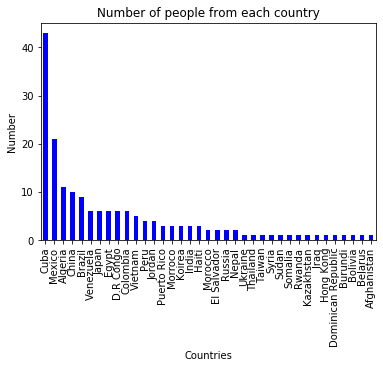

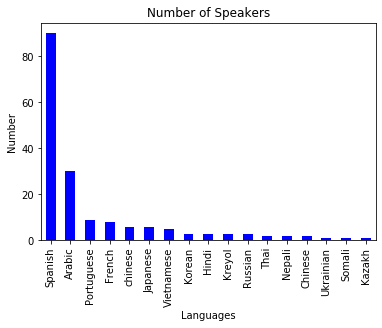

In [60]:
%matplotlib inline
import plotly.express as px
#port matplotlib.pyplot as plt

#Visulization for df2(Number of people from each country)
my_data = df2.plot(x="Country", y="Number_of_people" ,kind="bar",legend=None, title="Number of people from each country" ,color = "blue")
my_data.set_xlabel("Countries")
my_data.set_ylabel("Number")

#Visulization for df3(Number of Speakers)
my_data = df3.plot(x="Language", y="Number_of_Speakers" ,kind="bar",legend=None, title="Number of Speakers" ,color = "blue")
my_data.set_xlabel("Languages")
my_data.set_ylabel("Number")


#Visulization for df4(Gender)
df4 = px.data.tips()
my_data = px.pie(df4, color_discrete_sequence=px.colors.sequential.RdBu)




plt.show(my_data)